## Identificare code smells con approcci basati su Machine Learning

In [116]:
# Import delle librerie necessarie
import pandas as pd
import mysql.connector
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, PrecisionRecallDisplay, roc_auc_score

In [117]:
result = pd.read_csv("complete_dataset.csv")
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CBO,20861.0,9.069316,11.370901,0.0,2.000000,5.0,12.0,207.0
CYCLO,20861.0,36.428359,71.593285,0.0,5.000000,14.0,34.0,956.0
DIT,20861.0,1.576387,0.494142,1.0,1.000000,2.0,2.0,2.0
ELOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
FanIn,20861.0,145.199271,909.997981,0.0,1.000000,6.0,29.0,31934.0
FanOut,20861.0,39.832894,99.290150,0.0,1.000000,10.0,36.0,1926.0
LCOM,20861.0,195.574757,1016.795110,0.0,0.000000,3.0,36.0,21736.0
LOC,20861.0,209.126983,461.044339,2.0,24.000000,61.0,168.0,5438.0
LOCNAMM,20861.0,206.116869,458.603401,2.0,23.000000,59.0,166.0,5438.0
NOA,20861.0,5.989646,20.016290,0.0,0.000000,2.0,6.0,1634.0


In [118]:
result

,ComponentName,Project,CBO,CYCLO,DIT,ELOC,FanIn,FanOut,LCOM,LOC,...,WLOCNAMM,WMC,WMCNAMM,NMNOPARAM,CDSBP,CC,LC,LZC,RB,SC
0,example.Hello,ant-ivy-2.0.0-alpha2,1.0,1.0,1.0,11.0,3.0,4.0,0.0,11.0,...,6.000000,1.0,0.0,0.0,0,0,0,0,0,0
1,example.ConfigurationsExample,ant-ivy-2.0.0-alpha2,7.0,4.0,1.0,34.0,0.0,10.0,0.0,34.0,...,32.000000,4.0,0.0,0.0,0,0,0,0,0,0
2,filter.FilterProvider,ant-ivy-2.0.0-alpha2,0.0,4.0,1.0,18.0,1.0,3.0,0.0,18.0,...,16.000000,4.0,0.0,1.0,0,0,0,0,0,0
3,filter.IFilter,ant-ivy-2.0.0-alpha2,0.0,1.0,1.0,3.0,17.0,0.0,0.0,3.0,...,1.000000,1.0,0.0,0.0,0,0,0,0,0,0
4,filter.ccimpl.CCFilter,ant-ivy-2.0.0-alpha2,6.0,7.0,1.0,18.0,3.0,8.0,1.0,18.0,...,9.500000,7.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,jaxp.InputData,xerces2-j-Xerces-J_2_3_0,2.0,6.0,2.0,18.0,12.0,2.0,0.0,18.0,...,5.000000,6.0,0.0,1.0,0,0,0,0,0,0
20858,jaxp.JAXP12Tests,xerces2-j-Xerces-J_2_3_0,8.0,30.0,2.0,176.0,0.0,57.0,15.0,176.0,...,12.363636,30.0,0.0,10.0,0,0,0,0,0,0
20859,jaxp.JAXPConstants,xerces2-j-Xerces-J_2_3_0,0.0,0.0,1.0,11.0,4.0,0.0,0.0,11.0,...,NaN,0.0,0.0,0.0,0,0,0,0,0,0
20860,thread.Test,xerces2-j-Xerces-J_2_3_0,11.0,21.0,1.0,421.0,320.0,26.0,0.0,421.0,...,41.000000,21.0,0.0,1.0,0,0,0,0,0,0


## Data Preparation

### Data Cleaning

#### Poiché sono presenti valori Nan (Not a Number), onde evitare problemi di classificazione è preferibile eliminare i le istanze contenenti dati mancanti in quanto presenti in piccole quantità

#### Iniziamo vedendo quante istanze con valori NaN sono presenti

In [119]:
result.isnull().sum()

ComponentName      0
Project            0
CBO                1
CYCLO              1
DIT                1
ELOC               1
FanIn              1
FanOut             1
LCOM               1
LOC                1
LOCNAMM            1
NOA                1
NOC                1
NOM                1
NOMNAMM            1
NOPA               1
PMMM               1
PRB                1
WLOCNAMM         719
WMC                1
WMCNAMM            1
NMNOPARAM          1
CDSBP              0
CC                 0
LC                 0
LZC                0
RB                 0
SC                 0
dtype: int64

#### Analizziamo i risultati dopo l'eliminazione

In [120]:
result.dropna(inplace=True)
#Valori NaN eliminati
result.isnull().sum()

ComponentName    0
Project          0
CBO              0
CYCLO            0
DIT              0
ELOC             0
FanIn            0
FanOut           0
LCOM             0
LOC              0
LOCNAMM          0
NOA              0
NOC              0
NOM              0
NOMNAMM          0
NOPA             0
PMMM             0
PRB              0
WLOCNAMM         0
WMC              0
WMCNAMM          0
NMNOPARAM        0
CDSBP            0
CC               0
LC               0
LZC              0
RB               0
SC               0
dtype: int64

### Feature selection

#### Alcuni attributi, come: ComponentName o Project non sono utili ai fini della classificazione, quindi verranno eliminati

In [121]:
result.drop(['ComponentName', 'Project'], axis=1, inplace=True)

### Data Balancing
##### La variabile target che il modello deve predire in questo file è:
- LC: Large Class;
##### Analizziamo la sua distribuzione per quantificare quanto è bilanciato il dataset rispetto alla variabile dipendente.


<AxesSubplot: xlabel='LC', ylabel='Count'>

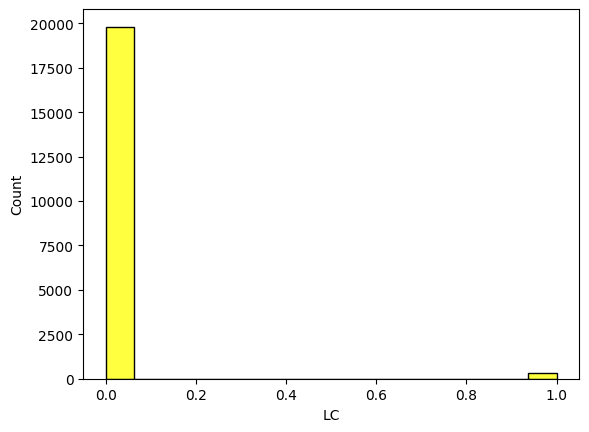

In [122]:
sns.histplot(result['LC'], legend=True, color='yellow')

#### Le istanze di classi che non contengono code smell di tipo "Complex Class" sono 19824, mentre quelle che contengono tale smell sono solo 337

In [123]:
result[result['LC'] == 0].count()

CBO          19806
CYCLO        19806
DIT          19806
ELOC         19806
FanIn        19806
FanOut       19806
LCOM         19806
LOC          19806
LOCNAMM      19806
NOA          19806
NOC          19806
NOM          19806
NOMNAMM      19806
NOPA         19806
PMMM         19806
PRB          19806
WLOCNAMM     19806
WMC          19806
WMCNAMM      19806
NMNOPARAM    19806
CDSBP        19806
CC           19806
LC           19806
LZC          19806
RB           19806
SC           19806
dtype: int64

In [124]:
result[result['LC'] == 1].count()

CBO          337
CYCLO        337
DIT          337
ELOC         337
FanIn        337
FanOut       337
LCOM         337
LOC          337
LOCNAMM      337
NOA          337
NOC          337
NOM          337
NOMNAMM      337
NOPA         337
PMMM         337
PRB          337
WLOCNAMM     337
WMC          337
WMCNAMM      337
NMNOPARAM    337
CDSBP        337
CC           337
LC           337
LZC          337
RB           337
SC           337
dtype: int64

#### Da come è possibile intuire, il dataset è fortemente sbilanciato. Le possibili soluzioni a questo problema sono due:
- Oversampling: aumentare il numero di istanze presenti nelle classi di minoranza;
- Undersampling: diminuire il numero di istanze presenti nelle classi di maggioranza;

#### Entrambe le soluzioni possono introdurre ulteriori problematiche, ad esempio l'undersampling casuale potrebbe portare alla rimozione di istanze particolarmente rilevanti per l’apprendimento del modello, mentre nel caso dell'oversampling, la duplicazione di istanze potrebbe creare overfitting

#### Bilanciamo il dataset aumentando il numero di istanze della classe di minoranza LC. Scegliamo casualmente 165 istanze (circa la metà) dalla classe di minoranza e aggiungiamo queste ultime al dataset.

In [125]:
# df_min classe di minoranza
df_min = result[result['LC'] == 1]

# Seme casuale
random = np.random.RandomState(None)

# Scelta casuale di 165 istanze 
idx = random.choice(df_min.index, 165, replace=True)
    
# seleziona le istanze del dataset originale corrispondenti agli indici selezionati
df_over = pd.concat([result, df_min.loc[idx]])

# finito il bilanciamento

In [126]:
X = df_over.drop(['LC'], axis=1)
y = df_over['LC']

# Split dei dati in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalizzo
normalizer = MinMaxScaler()
transformer = normalizer.fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_test_normalized = transformer.transform(X_test)

In [127]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_normalized, y_train)
y_pred = rf.predict(X_test_normalized)

In [128]:
print("Numero di punti etichettati erroneamente su un totale di %d punti : %d"% (X_test_normalized.shape[0], (y_test != y_pred).sum()))

Numero di punti etichettati erroneamente su un totale di 6093 punti : 10


In [129]:
precision_score(y_test, y_pred, average='micro')

0.9983587723617265

In [130]:
accuracy_score(y_test, y_pred)

0.9983587723617265

In [131]:
recall_score(y_test, y_pred, average='micro')

0.9983587723617265

In [132]:
f1_score(y_test, y_pred, average='macro')

0.9839536280128097

In [133]:
matthews_corrcoef(y_test, y_pred)

0.9679871516902209

#### Utilizziamo la matrice di confusione per interpretare correttamente i valori ottenuti, così da capire quante istanze sono state classificate in maniera errata, e soprattutto, dove si sono concentrati maggiormente gli errori.

<AxesSubplot: >

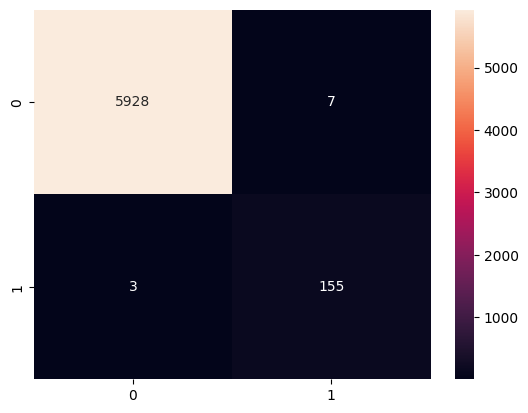

In [134]:
sns.heatmap([
    [
        sum(y_pred[y_test == 0] == 0),
        sum(y_pred[y_test == 0] == 1)
    ],
    [
        sum(y_pred[y_test == 1] == 0),
        sum(y_pred[y_test == 1] == 1)
    ]
], annot=True, fmt="")